# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
bank_file = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/banklist.csv'

In [3]:
banks = pd.read_csv(bank_file, parse_dates = ['Closing Date', 'Updated Date'])

# Figure Out Data Structure

In [4]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


In [5]:
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05


In [6]:
banks.shape

(555, 7)

In [7]:
banks['Closing Date'].min()

Timestamp('2000-10-13 00:00:00')

In [8]:
banks['Closing Date'].max()

Timestamp('2017-12-15 00:00:00')

In [9]:
# row count in each group
s = banks.groupby(by = banks['Closing Date'].dt.year).size()
s

Closing Date
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

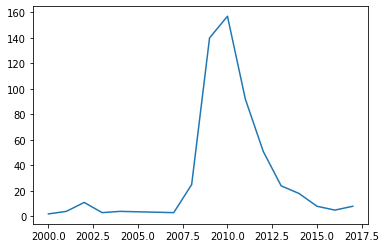

In [10]:
plt.plot(s)
plt.show()

# using df.set_index() method

In [11]:
banks2 = banks.set_index(keys = 'Closing Date')
banks2.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05


In [12]:
banks2.resample('Y').size()

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, dtype: int64

In [13]:
banks2.groupby(by = banks['Closing Date'].dt.quarter).size()

Series([], dtype: int64)

In [14]:
s2 = banks2.resample('Q').size()
s2

Closing Date
2000-12-31    2
2001-03-31    1
2001-06-30    1
2001-09-30    2
2001-12-31    0
             ..
2016-12-31    0
2017-03-31    3
2017-06-30    3
2017-09-30    0
2017-12-31    2
Freq: Q-DEC, Length: 69, dtype: int64

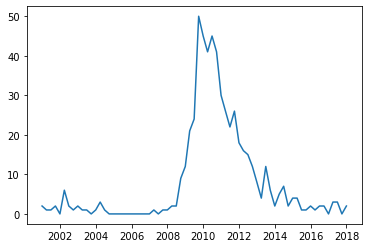

In [15]:
plt.plot(s2)
plt.show()